In [1]:
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon
import pandas as pd
%matplotlib inline

In [2]:
astroplan.download_IERS_A()

custom_cycler=[]
colors=[]
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)

observer = astroplan.Observer.at_site('keck')

# Set up times for the night

In [3]:
#04:54 - 10:31
today = Time('2021-01-16 04:00:00', scale='utc')

pre_twi12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg env twilight', pre_twi12deg.iso)
pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg env twilight', pre_twi15deg.iso)
pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)
twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)
twi12deg = observer.twilight_morning_nautical(today)
print('12 deg morn twilight', twi12deg.iso)


handoff = Time('2021-01-16 10:31:00', scale='utc')

12 deg env twilight 2021-01-16 04:54:20.734
15 deg env twilight 2021-01-16 05:07:44.558
18 deg eve twilight 2021-01-16 05:21:04.074
18 deg morn twilight 2021-01-16 15:42:18.090
15 deg morn twilight 2021-01-16 15:55:37.018
12 deg morn twilight 2021-01-15 16:08:54.434


# Loading standards

In [4]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)

HZ4           = astroplan.FixedTarget(coord=SkyCoord('03:55:21.7','+09:47:18',unit=(u.hourangle, u.degree)),
                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2
LTT9239         = astroplan.FixedTarget(coord=SkyCoord('22 52 40.88', '-20 35 26.3', unit=(u.hourangle, u.degree)),
                                      name='LTT9239')
LTT1020    = astroplan.FixedTarget(coord=SkyCoord('01:54:49.7', '-27:28:29', unit=(u.hourangle, u.degree)),
                                      name='LTT1020')#V~11.522

stds = [gd71, BD284211, BD174708, HD19445, G191B2B, HD84937, Feige34, HZ44, BD262606, BD33d2642, 
        Feige110, Feige66, HZ4,PG0205134, Feige11, Hiltner600, LTT9239,LTT1020]

# Choose standards for the night

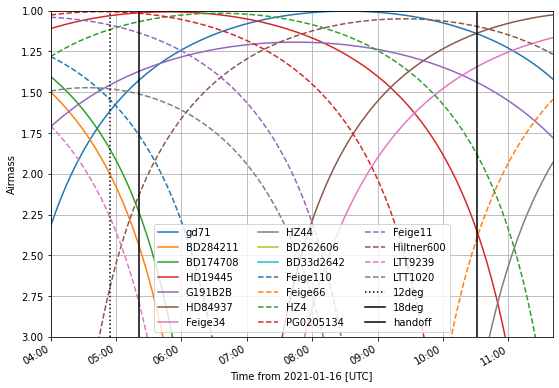

In [5]:
from astropy.utils.iers import conf
conf.auto_max_age = None
time = today+np.linspace(0, 0.32, 100)
plt.figure(figsize=(9,6))
for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle)
plt.axvline(pre_twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
plt.axvline(handoff.plot_date, label='handoff', color='k')
plt.legend(ncol=3, loc='lower center')
plt.grid()

In [24]:
chosen_stds = [G191B2B, gd71, HD84937]

In [7]:
sn2019uo    = astroplan.FixedTarget(coord=SkyCoord('12:02:36.56', '+41:03:42.3', unit=(u.hourangle, u.degree)),
                                  name='2019uo')
sn2017ivh    = astroplan.FixedTarget(coord=SkyCoord('13:39:36.25', '-11:28:55.9', unit=(u.hourangle, u.degree)),
                                  name='2017ivh')
sn2017ivv    = astroplan.FixedTarget(coord=SkyCoord('20:28:49.84', '-04:22:57.3', unit=(u.hourangle, u.degree)),
                                  name='2017ivv')
sn2018gj    = astroplan.FixedTarget(coord=SkyCoord('16:32:02.40', '+78:12:41.1', unit=(u.hourangle, u.degree)),
                                  name='2018gj')
sn2018aoq    = astroplan.FixedTarget(coord=SkyCoord('12:10:38.19', '+39:23:47.0', unit=(u.hourangle, u.degree)),
                                  name='2018aoq')
sn2018las    = astroplan.FixedTarget(coord=SkyCoord('10:59:52.23', '+19:47:41.8', unit=(u.hourangle, u.degree)),
                                  name='2018las')
sn2018aoz  = astroplan.FixedTarget(coord=SkyCoord('11:51:01.79', '-28:44:38.4', unit=(u.hourangle, u.degree)),
                                   name='2018aoz')
sn2018bsz = astroplan.FixedTarget(coord=SkyCoord('16:09:39.20', '-32:03:45.2', unit=(u.hourangle, u.degree)),
                                   name='2018bsz')
sn2018hmx = astroplan.FixedTarget(coord=SkyCoord('08:33:39.34', '+55:35:53.0', unit=(u.hourangle, u.degree)),
                                   name='2018hmx')
sn2018hna = astroplan.FixedTarget(coord=SkyCoord('12:26:12.05', '+58:18:51.1', unit=(u.hourangle, u.degree)),
                                   name='2018hna')
sn2018bwr = astroplan.FixedTarget(coord=SkyCoord('15:28:26.17', '+08:48:22.2', unit=(u.hourangle, u.degree)),
                                   name='2018bwr')
sn2017cjb = astroplan.FixedTarget(coord=SkyCoord('12:53:50.45', '+09:42:17.7', unit=(u.hourangle, u.degree)),
                                   name='2017cjb')
sn2018hhn = astroplan.FixedTarget(coord=SkyCoord('22:52:32.06', '+11:40:26.7', unit=(u.hourangle, u.degree)),
                                   name='2018hhn')
sn2018giu = astroplan.FixedTarget(coord=SkyCoord('20:27:49.22', '+09:54:51.9', unit=(u.hourangle, u.degree)),
                                   name='2018giu')
sn2018eog = astroplan.FixedTarget(coord=SkyCoord('20:28:12.03', '-03:08:11.2', unit=(u.hourangle, u.degree)),
                                   name='2018eog')
sn2019cxu = astroplan.FixedTarget(coord=SkyCoord('13:05:30.09', '-08:45:52.7', unit=(u.hourangle, u.degree)),
                                   name='2019cxu')


sn2017gas = astroplan.FixedTarget(coord=SkyCoord('20:17:11.36', '58:12:08.10', unit=(u.hourangle, u.degree)),
                                  name='2017gas')

sn2019jyw = astroplan.FixedTarget(coord=SkyCoord('01:06:30.21', '-02:11:56.3', unit=(u.hourangle, u.degree)),
                                  name='2019jyw')
sn2019muj = astroplan.FixedTarget(coord=SkyCoord('02:26:18.55', '-09:50:09.0', unit=(u.hourangle, u.degree)),
                                  name='2019muj')
sn2019nyk = astroplan.FixedTarget(coord=SkyCoord('00:15:15.21', '-08:11:21.8', unit=(u.hourangle, u.degree)),
                                  name='2019nyk')
sn2019hnl = astroplan.FixedTarget(coord=SkyCoord('23:43:10.24', '-02:56:58.7', unit=(u.hourangle, u.degree)),
                                  name='2019hnl')


sn2020ue = astroplan.FixedTarget(coord=SkyCoord('12:42:46.78', '02:39:34.2', unit=(u.hourangle, u.degree)),
                                  name='2020ue')
sn2020nlb = astroplan.FixedTarget(coord=SkyCoord('12:25:24.18', '18:12:12.5', unit=(u.hourangle, u.degree)),
                                  name='2020nlb')
sn2020nvb = astroplan.FixedTarget(coord=SkyCoord('12:28:58.82', '03:34:22.1', unit=(u.hourangle, u.degree)),
                                  name='2020nvb')
sn2020hvf = astroplan.FixedTarget(coord=SkyCoord('11:21:26.45', '03:00:52.8', unit=(u.hourangle, u.degree)),
                                  name='2020hvf')
sn2020pst = astroplan.FixedTarget(coord=SkyCoord('01:13:12.00', '+02:17:01.9', unit=(u.hourangle, u.degree)),
                                  name='2020pst')
sn2020qic = astroplan.FixedTarget(coord=SkyCoord('00:15:05.61', '+43:20:35.6', unit=(u.hourangle, u.degree)),
                                  name='2020qic')

sn2019tua = astroplan.FixedTarget(coord=SkyCoord('21:58:00.29', '+24:15:56.9', unit=(u.hourangle, u.degree)),
                                  name='2019tua')
sn2019iex = astroplan.FixedTarget(coord=SkyCoord('23:51:03.61', '+20:08:43.7', unit=(u.hourangle, u.degree)),
                                  name='2019iex')
sn2020ekk = astroplan.FixedTarget(coord=SkyCoord('16:44:45.16', '+22:30:48.0', unit=(u.hourangle, u.degree)),
                                  name='2020ekk')
sn2019yz = astroplan.FixedTarget(coord=SkyCoord('15:41:57.30', '+00:42:39.4', unit=(u.hourangle, u.degree)),
                                  name='2019yz')
sn2019osl = astroplan.FixedTarget(coord=SkyCoord('04:38:54.33', '+18:50:10.2', unit=(u.hourangle, u.degree)),
                                  name='2019osl')
sn2019cmv = astroplan.FixedTarget(coord=SkyCoord('18:57:52.99', '+45:35:24.0', unit=(u.hourangle, u.degree)),
                                  name='2019cmv')
sn2020nxt = astroplan.FixedTarget(coord=SkyCoord('22:37:36.24', '+35:00:07.7', unit=(u.hourangle, u.degree)),
                                  name='2020nxt')
sn2020cxd = astroplan.FixedTarget(coord=SkyCoord('17:26:29.26', '+71:05:38.6', unit=(u.hourangle, u.degree)),
                                  name='2020cxd')
sn2020znl = astroplan.FixedTarget(coord=SkyCoord('06:13:17.90', '-15:53:31.4', unit=(u.hourangle, u.degree)),
                                  name='2020znl')
sn2020ocz = astroplan.FixedTarget(coord=SkyCoord('05:10:44.20', '-31:35:37.6', unit=(u.hourangle, u.degree)),
                                  name='2020ocz')
sn2020scb = astroplan.FixedTarget(coord=SkyCoord('00:18:25.63', '+18:30:59.6', unit=(u.hourangle, u.degree)),
                                  name='2020scb')
sn2020jgl = astroplan.FixedTarget(coord=SkyCoord('09:28:58.43', '-14:48:19.8', unit=(u.hourangle, u.degree)),
                                  name='2020jgl')
sn2019xdf = astroplan.FixedTarget(coord=SkyCoord('09:27:51.81', '+69:24:42.4', unit=(u.hourangle, u.degree)),
                                  name='2019xdf')

In [25]:
targets = [sn2019iex, sn2019osl, sn2020pst, sn2020qic, sn2020znl, sn2020ocz, sn2020scb, sn2020jgl, 
           sn2019muj, sn2019xdf]

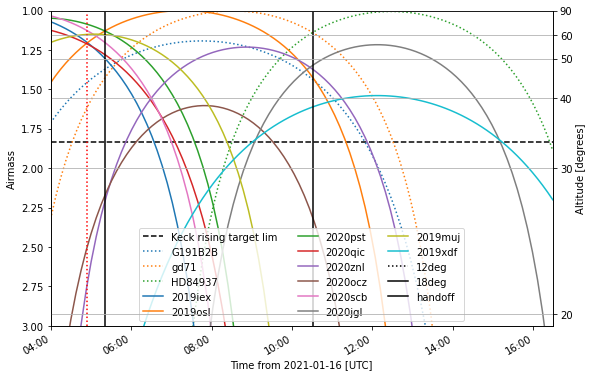

In [26]:
plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
time = today+np.linspace(0, 0.52, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi12deg.plot_date, color='red', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility.pdf')

In [37]:
tab = """G191B2B 05:05:30.60 +52:49:54.0 11.9 1x60
2019iex 23:51:03.61 +20:08:43.7 22 3x1200
2020scb 00:18:25.63 +18:30:59.6 20.5 1x1100
2020qic 00:15:05.61 +43:20:35.6 21.5 2x1200
2019muj 02:26:18.55 -09:50:09.0 22 3x1200
HD84937 09:48:56.09 +13:44:39.3 8.3 1x10
2020jgl 09:28:58.43 -14:48:19.8 19.5 1x900
2019xdf 09:27:51.81 +69:24:42.4 22.5 3x1200
G191B2B 05:05:30.60 +52:49:54.0 11.9 1x60"""

# 2020znl 06:13:17.90 -15:53:31.4 19.3 1x600
# 2019osl 04:38:54.33 +18:50:10.2 21.5 2x1200
# 2020ocz 05:10:44.20 -31:35:37.6 18 1x300

In [38]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())
    
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
G191B2B,05:05:30.60,+52:49:54.0,11.9,1x60,1.0,60.0
2019iex,23:51:03.61,+20:08:43.7,22,3x1200,3.0,1200.0
2020scb,00:18:25.63,+18:30:59.6,20.5,1x1100,1.0,1100.0
2020qic,00:15:05.61,+43:20:35.6,21.5,2x1200,2.0,1200.0
2019muj,02:26:18.55,-09:50:09.0,22,3x1200,3.0,1200.0
HD84937,09:48:56.09,+13:44:39.3,8.3,1x10,1.0,10.0
2020jgl,09:28:58.43,-14:48:19.8,19.5,1x900,1.0,900.0
2019xdf,09:27:51.81,+69:24:42.4,22.5,3x1200,3.0,1200.0
G191B2B,05:05:30.60,+52:49:54.0,11.9,1x60,1.0,60.0


# Add real time to the table

In [39]:
#night_start = handoff
night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
    
tbdata['start'] = obs_start[:-1]
tbdata

with open('plan.txt','w') as f:
    for i in range(len(tbdata)):
        for c in tbdata.keys():
            f.write(str(tbdata[c][i])+' | ')
        f.write('\n')

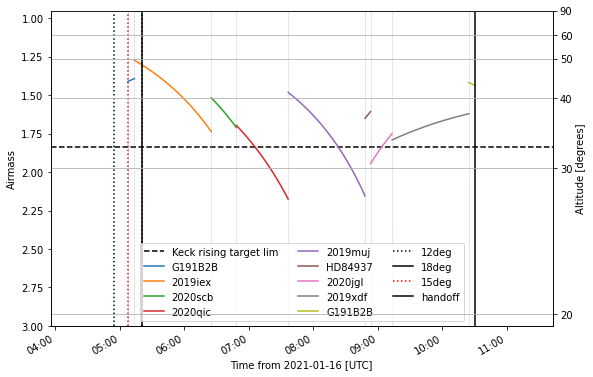

In [40]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(pre_twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(pre_twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule.pdf')